In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\sahit\Downloads\archive (6)\penguins.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Label Encoder -categorical to numeric 

In [9]:
from sklearn.preprocessing import LabelEncoder
cat=['island','sex']
lb=LabelEncoder()
for i in cat:
    df[i]=lb.fit_transform(df[i])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


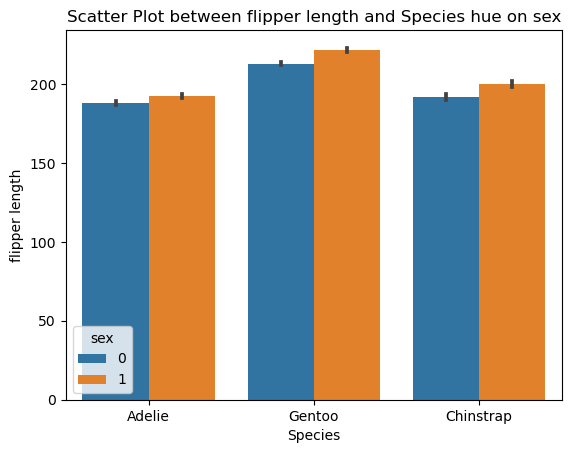

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.barplot(y='flipper_length_mm', x='species',hue='sex', data=df)
plt.title('Scatter Plot between flipper length and Species hue on sex')
plt.ylabel('flipper length')
plt.xlabel('Species')
plt.show()

Spliting data

In [10]:
from sklearn.model_selection import train_test_split
cols=['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']
x=df[cols]
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
pred1=model1.predict(x_test)
pred1

array(['Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo'], dtype=object)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.9402985074626866

Adelie

In [14]:
import warnings
warnings.filterwarnings('ignore')

pic=model1.predict([[2,39.1,18.7,181.0,3750.0,1]])
print(pic)

['Adelie']


Gentoo

In [15]:
pic=model1.predict([[0,46.5,14.4,217.0,4900.0,0]])
print(pic)

['Gentoo']


Chinstrap

In [16]:
pic=model1.predict([[1,50.2,18.7,198.0,3775.0,0]])
print(pic)

['Chinstrap']


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [18]:
pred2=model2.predict(x_test)

In [19]:
accuracy_score(y_test,pred2)

1.0

In [20]:
pic=model2.predict([[0,46.5,14.4,217.0,4900.0,0]])
pic

array(['Gentoo'], dtype=object)

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
pred3=model3.predict(x_test)

In [23]:
accuracy_score(y_test,pred3)

0.9701492537313433

In [24]:
pic=model3.predict([[1,50.2,18.7,198.0,3775.0,0]])
pic

array(['Chinstrap'], dtype=object)

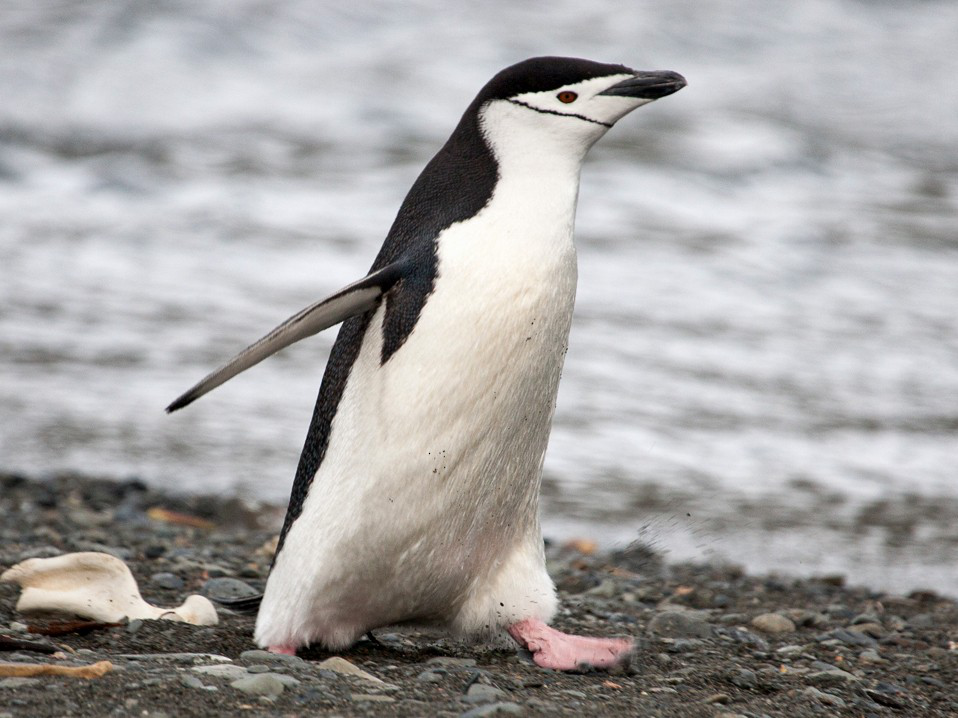

In [29]:
from PIL import Image

if(pic[0]=='Adelie'):
    i=Image.open(r"C:\Users\sahit\Downloads\adelie.jpg")
    display(i)
elif(pic[0]=='Gentoo'):
    i=Image.open(r"C:\Users\sahit\Downloads\gentoo.jpg")
    i.show()
else:
    i=Image.open(r"C:\Users\sahit\Downloads\chinstrap.jpeg")
    display(i)